<a href="https://colab.research.google.com/github/SSanjey/ssanjey.github.io/blob/main/%5BFODS%5DLab_Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import pandas library
import pandas as pd

# Read the csv file as DataFrame
df = pd.read_csv('/content/nc-est2015-agesex-res.csv')

In [4]:
# Find size
print("The size of the DataFrame is:", df.size)

The size of the DataFrame is: 3060


In [5]:
# Describe the data
print("The summary statistics of the DataFrame are:")
print(df.describe())

The summary statistics of the DataFrame are:
              SEX         AGE  CENSUS2010POP  ESTIMATESBASE2010  \
count  306.000000  306.000000   3.060000e+02       3.060000e+02   
mean     1.000000   59.303922   4.035889e+06       4.036054e+06   
std      0.817834   98.060950   2.140881e+07       2.140968e+07   
min      0.000000    0.000000   6.073000e+03       6.075000e+03   
25%      0.000000   25.000000   9.987065e+05       9.987415e+05   
50%      1.000000   50.500000   2.045286e+06       2.045342e+06   
75%      2.000000   76.000000   2.304370e+06       2.304525e+06   
max      2.000000  999.000000   3.087455e+08       3.087581e+08   

       POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
count     3.060000e+02     3.060000e+02     3.060000e+02     3.060000e+02   
mean      4.043750e+06     4.074756e+06     4.105917e+06     4.136306e+06   
std       2.145038e+07     2.161430e+07     2.177900e+07     2.193965e+07   
min       6.104000e+03     6.606000e+03    

In [6]:
# Re-label column years as “2014” and “2010”
df = df.rename(columns={"POPESTIMATE2014": "2014", "POPESTIMATE2010": "2010"})

In [7]:
# Display first 10 rows
print("The first 10 rows of the DataFrame are:")
print(df.head(10))

The first 10 rows of the DataFrame are:
   SEX  AGE  CENSUS2010POP  ESTIMATESBASE2010     2010  POPESTIMATE2011  \
0    0    0        3944153            3944160  3951330          3963087   
1    0    1        3978070            3978090  3957888          3966551   
2    0    2        4096929            4096939  4090862          3971565   
3    0    3        4119040            4119051  4111920          4102470   
4    0    4        4063170            4063186  4077551          4122294   
5    0    5        4056858            4056872  4064653          4087709   
6    0    6        4066381            4066412  4073013          4074993   
7    0    7        4030579            4030594  4043046          4083225   
8    0    8        4046486            4046497  4025604          4053203   
9    0    9        4148353            4148369  4125415          4035710   

   POPESTIMATE2012  POPESTIMATE2013     2014  POPESTIMATE2015  
0          3926540          3931141  3949775          3978038  
1     

In [8]:
# Select 15th and 22nd rows
print("The 15th and 22nd rows of the DataFrame are:")
print(df.iloc[[14, 21]])

The 15th and 22nd rows of the DataFrame are:
    SEX  AGE  CENSUS2010POP  ESTIMATESBASE2010     2010  POPESTIMATE2011  \
14    0   14        4165982            4166059  4145614          4131501   
21    0   21        4354294            4354603  4387956          4596166   

    POPESTIMATE2012  POPESTIMATE2013     2014  POPESTIMATE2015  
14          4135460          4148966  4233839          4185386  
21          4632892          4580130  4492373          4456790  


In [9]:
# Add columns change, percentage change
df["change"] = df["2014"] - df["2010"]
df["percentage change"] = (df["change"] / df["2010"]) * 100

In [10]:
# Analyse the population changes (67-71) – show “graying of US” aspect
print("The population changes for the age group 67-71 are:")
print(df.loc[(df["AGE"] >= 67) & (df["AGE"] <= 71), ["AGE", "change", "percentage change"]])
print("The population changes for this age group show the graying of US aspect, as they have a much higher percentage change than the overall population. This is because this age group corresponds to the post-WWII baby boomers who were born in the years 1947 to 1950.")


The population changes for the age group 67-71 are:
     AGE  change  percentage change
67    67  791534          29.384562
68    68  212543           9.006762
69    69  366465          16.904693
70    70  402861          19.531925
71    71  566098          28.977067
169   67  382853          30.142464
170   68  105579           9.548620
171   69  180090          17.887686
172   70  194435          20.379468
173   71  265857          29.433119
271   67  408681          28.708339
272   68  106964           8.529029
273   69  186375          16.052308
274   70  208426          18.802458
275   71  300241          28.584880
The population changes for this age group show the graying of US aspect, as they have a much higher percentage change than the overall population. This is because this age group corresponds to the post-WWII baby boomers who were born in the years 1947 to 1950.


In [11]:
# Analyse gender ratio of boys and girls among infants (age =0)
print("The gender ratio of boys and girls among infants (age = 0) is:")
print(df.loc[df["AGE"] == 0, ["SEX", "2014"]])
print("The gender ratio of boys to girls is:", round(df.loc[(df["AGE"] == 0) & (df["SEX"] == 1), "2014"].values[0] / df.loc[(df["AGE"] == 0) & (df["SEX"] == 2), "2014"].values[0], 2))

The gender ratio of boys and girls among infants (age = 0) is:
     SEX     2014
0      0  3949775
102    1  2020326
204    2  1929449
The gender ratio of boys to girls is: 1.05


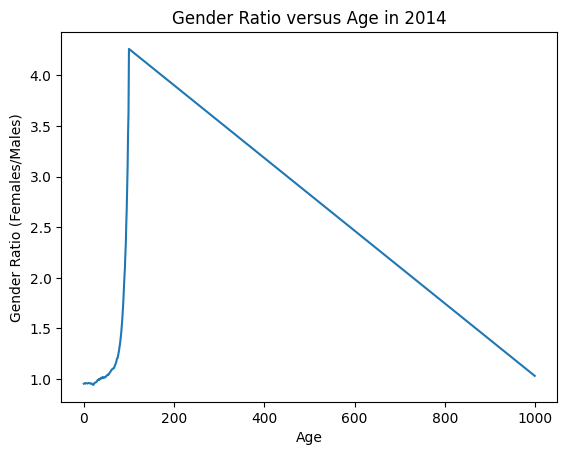

In [13]:
# Plot the gender ratio versus age
import matplotlib.pyplot as plt
plt.plot(df.loc[df["SEX"] == 0, "AGE"], female_male_ratio)
plt.xlabel("Age")
plt.ylabel("Gender Ratio (Females/Males)")
plt.title("Gender Ratio versus Age in 2014")
plt.show()

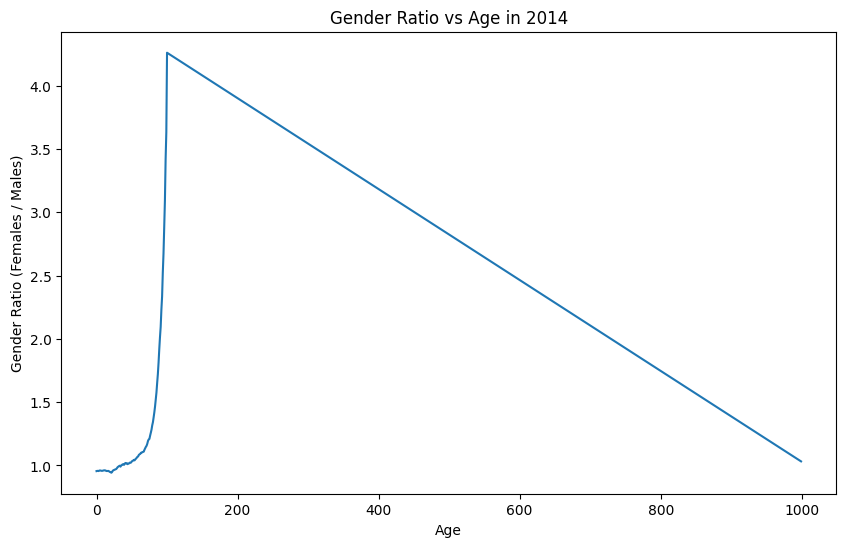

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
df_gender_age = df.groupby(["AGE", "SEX"])["2014"].sum().unstack() # create a new DataFrame with age and genders
df_gender_age["ratio"] = df_gender_age[2] / df_gender_age[1] # calculate the ratio of females to males
plt.figure(figsize=(10, 6)) # create a figure
sns.lineplot(data=df_gender_age, x="AGE", y="ratio") # create a line plot
plt.xlabel("Age") # add x-axis label
plt.ylabel("Gender Ratio (Females / Males)") # add y-axis label
plt.title("Gender Ratio vs Age in 2014") # add title
plt.show() # show the plot
